In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle

data = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/3rd Year Project/performance.csv")
df=pd.DataFrame(data)

print(df)

df.isnull().sum()

      percentage educational_resources parents_education  personality passion  \
0           85.0                  good          graduate  extroverted     yes   
1           78.0          satisfactory     undergraduate   ambiverted      no   
2           92.0                  poor               PhD  introverted     yes   
3           87.0                  good          graduate  extroverted      no   
4           80.0          satisfactory     undergraduate   ambiverted     yes   
...          ...                   ...               ...          ...     ...   
997         73.0          satisfactory                12  extroverted     yes   
998         89.0          satisfactory           below10  introverted      no   
999         82.0                  good          graduate   ambiverted     yes   
1000        85.0                  good          graduate  extroverted     yes   
1001        78.0          satisfactory     undergraduate   ambiverted      no   

      ott_time  sm_time  tr

percentage               0
educational_resources    0
parents_education        0
personality              0
passion                  0
ott_time                 0
sm_time                  0
travel_time              0
eduvids_time             0
game_time                0
extra_time               0
ai_usage                 0
dtype: int64

In [98]:
null_values=df.isnull()
print(null_values)

total_null_values=df.isnull().sum()
print(total_null_values)


      percentage  educational_resources  parents_education  personality  \
0          False                  False              False        False   
1          False                  False              False        False   
2          False                  False              False        False   
3          False                  False              False        False   
4          False                  False              False        False   
...          ...                    ...                ...          ...   
997        False                  False              False        False   
998        False                  False              False        False   
999        False                  False              False        False   
1000       False                  False              False        False   
1001       False                  False              False        False   

      passion  ott_time  sm_time  travel_time  eduvids_time  game_time  \
0       False     False  

In [99]:
# Map educational_resources values to numerical representations
# convert categorical variable to numerical
df['passion'] = df['passion'].apply(lambda x: 1 if x =='yes' else 0)
print(df)


      percentage educational_resources parents_education  personality  \
0           85.0                  good          graduate  extroverted   
1           78.0          satisfactory     undergraduate   ambiverted   
2           92.0                  poor               PhD  introverted   
3           87.0                  good          graduate  extroverted   
4           80.0          satisfactory     undergraduate   ambiverted   
...          ...                   ...               ...          ...   
997         73.0          satisfactory                12  extroverted   
998         89.0          satisfactory           below10  introverted   
999         82.0                  good          graduate   ambiverted   
1000        85.0                  good          graduate  extroverted   
1001        78.0          satisfactory     undergraduate   ambiverted   

      passion  ott_time  sm_time  travel_time  eduvids_time  game_time  \
0           1       2.0      1.0          0.5    

In [100]:
df.columns

Index(['percentage', 'educational_resources', 'parents_education',
       'personality', 'passion', 'ott_time', 'sm_time', 'travel_time',
       'eduvids_time', 'game_time', 'extra_time', 'ai_usage'],
      dtype='object')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   percentage             1002 non-null   float64
 1   educational_resources  1002 non-null   object 
 2   parents_education      1002 non-null   object 
 3   personality            1002 non-null   object 
 4   passion                1002 non-null   int64  
 5   ott_time               1002 non-null   float64
 6   sm_time                1002 non-null   float64
 7   travel_time            1002 non-null   float64
 8   eduvids_time           1002 non-null   float64
 9   game_time              1002 non-null   float64
 10  extra_time             1002 non-null   float64
 11  ai_usage               1002 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 94.1+ KB


In [102]:
df['percentage']=df['percentage'].astype(int)

In [103]:
mapping_dict1 = {'good': 2, 'poor': 0, 'satisfactory': 1}

# Apply the mapping to the DataFrame column
df['educational_resources'] = df['educational_resources'].map(mapping_dict1)


In [104]:
# Apply the mapping to the DataFrame column
mapping_dict2 = {'extroverted': 0, 'introverted': 2, 'ambiverted': 1}
df['personality'] = df['personality'].map(mapping_dict2)

In [105]:
mapping_dict3 = {'regular': 0, 'never': 2, 'occasional': 1}

# Apply the mapping to the DataFrame column
df['ai_usage'] = df['ai_usage'].map(mapping_dict3)

In [106]:
# Apply the mapping to the DataFrame column
mapping_dict4 = {'below10': 1, '10': 2, '12': 3, 'undergraduate': 4, 'graduate': 5, 'PhD': 6}
df['parents_education'] = df['parents_education'].map(mapping_dict4)


In [107]:
df['study_time'] = 9-df['ott_time']-df['sm_time']-df['travel_time']+df['eduvids_time']-df['game_time']-df['extra_time']

In [108]:
# Print the modified DataFrame
print(df)

      percentage  educational_resources  parents_education  personality  \
0             85                      2                  5            0   
1             78                      1                  4            1   
2             92                      0                  6            2   
3             87                      2                  5            0   
4             80                      1                  4            1   
...          ...                    ...                ...          ...   
997           73                      1                  3            0   
998           89                      1                  1            2   
999           82                      2                  5            1   
1000          85                      2                  5            0   
1001          78                      1                  4            1   

      passion  ott_time  sm_time  travel_time  eduvids_time  game_time  \
0           1       2.0  

array([[<Axes: title={'center': 'percentage'}>,
        <Axes: title={'center': 'educational_resources'}>],
       [<Axes: title={'center': 'parents_education'}>,
        <Axes: title={'center': 'passion'}>],
       [<Axes: title={'center': 'ai_usage'}>,
        <Axes: title={'center': 'study_time'}>]], dtype=object)

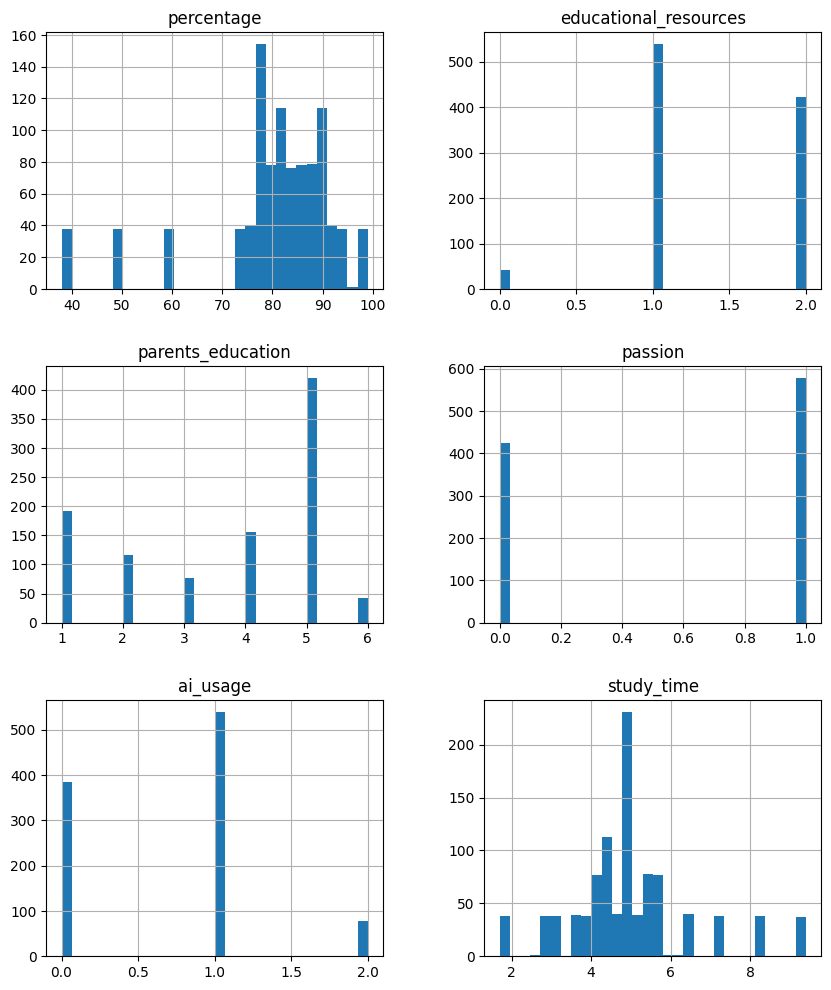

In [109]:
import matplotlib.pyplot as plt
df[  ['percentage', 'educational_resources', 'parents_education', 'passion', 'ai_usage', 'study_time']].hist(bins=30, figsize=(10,12))

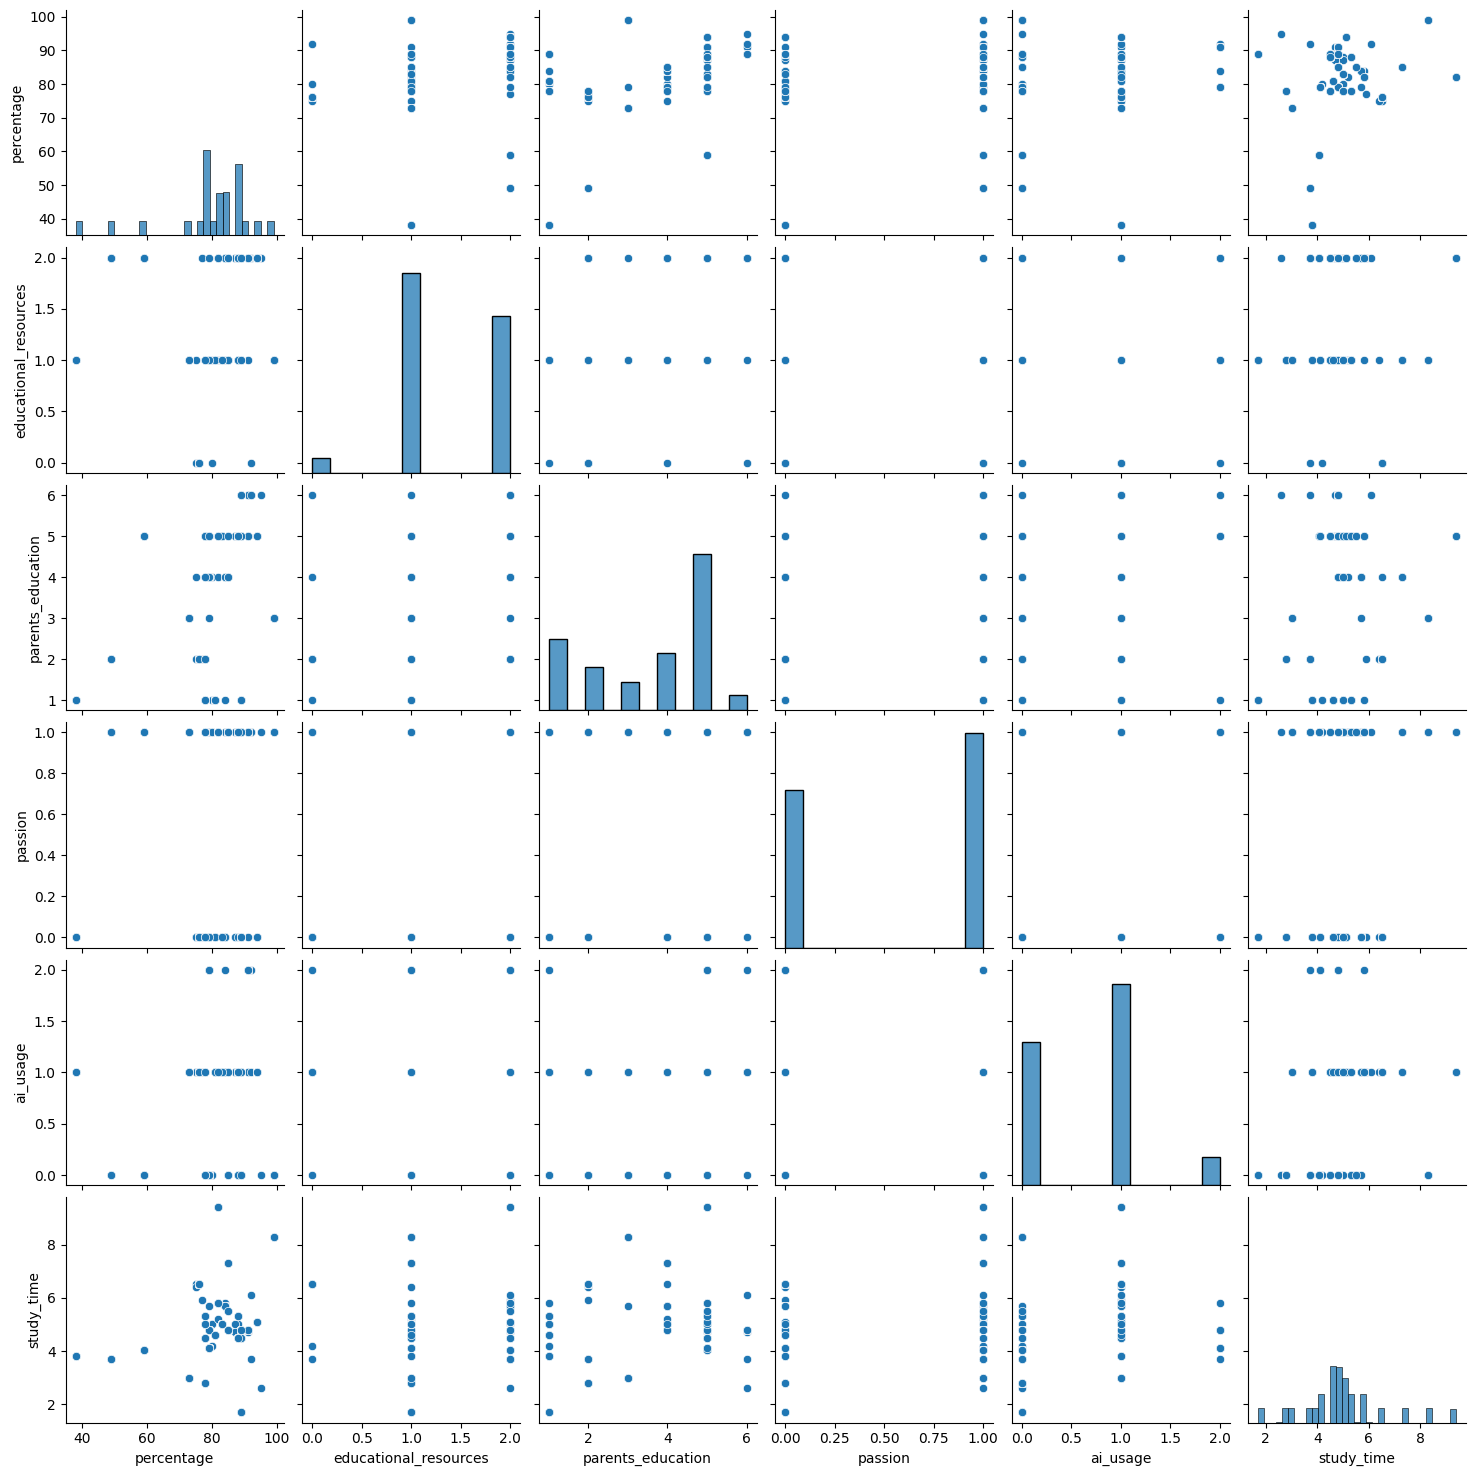

In [110]:
import seaborn as sns
# plot pairplot
sns.pairplot(df[  ['percentage', 'educational_resources', 'parents_education', 'passion', 'ai_usage', 'study_time']])

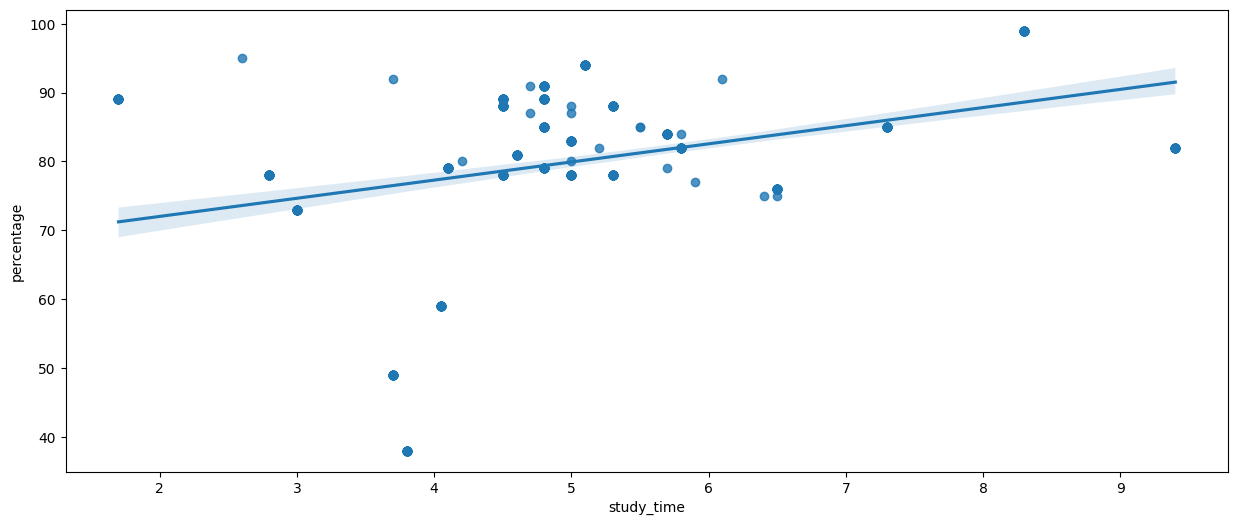

In [111]:
#regplot=regression plotting
plt.figure(figsize = (15, 6))
sns.regplot(x = 'study_time', y = 'percentage', data = df)
plt.show()

In [112]:
df.corr()

,percentage,educational_resources,parents_education,personality,passion,ott_time,sm_time,travel_time,eduvids_time,game_time,extra_time,ai_usage,study_time
percentage,1.000000,0.095453,0.397126,-0.064816,0.112443,-0.044085,-0.101747,-0.287820,0.565376,-0.066835,0.289770,0.073116,0.319353
educational_resources,0.095453,1.000000,0.528670,0.252421,0.443097,0.343541,-0.353435,-0.451788,-0.008206,-0.255389,0.333677,-0.115737,0.038864
parents_education,0.397126,0.528670,1.000000,0.311710,0.408589,0.310156,-0.477724,-0.642835,0.329074,-0.012386,0.326856,0.261379,0.256791
personality,-0.064816,0.252421,0.311710,1.000000,0.309955,-0.302741,0.184115,-0.234923,-0.112749,0.167559,0.054622,0.156065,-0.002282
passion,0.112443,0.443097,0.408589,0.309955,1.000000,0.109569,-0.113343,-0.345189,0.104740,-0.273914,-0.095201,-0.184600,0.267258
ott_time,-0.044085,0.343541,0.310156,-0.302741,0.109569,1.000000,-0.552878,-0.279087,-0.206298,-0.308055,0.415463,0.049833,-0.355674
sm_time,-0.101747,-0.353435,-0.477724,0.184115,-0.113343,-0.552878,1.000000,0.420369,-0.154258,0.009189,-0.288266,-0.072792,-0.235425
travel_time,-0.287820,-0.451788,-0.642835,-0.234923,-0.345189,-0.279087,0.420369,1.000000,-0.134517,0.131461,-0.294157,-0.198992,-0.296871
eduvids_time,0.565376,-0.008206,0.329074,-0.112749,0.104740,-0.206298,-0.154258,-0.134517,1.000000,-0.178889,0.031643,0.143649,0.742578
game_time,-0.066835,-0.255389,-0.012386,0.167559,-0.273914,-0.308055,0.009189,0.131461,-0.178889,1.000000,0.025867,-0.074323,-0.298899


<Axes: >

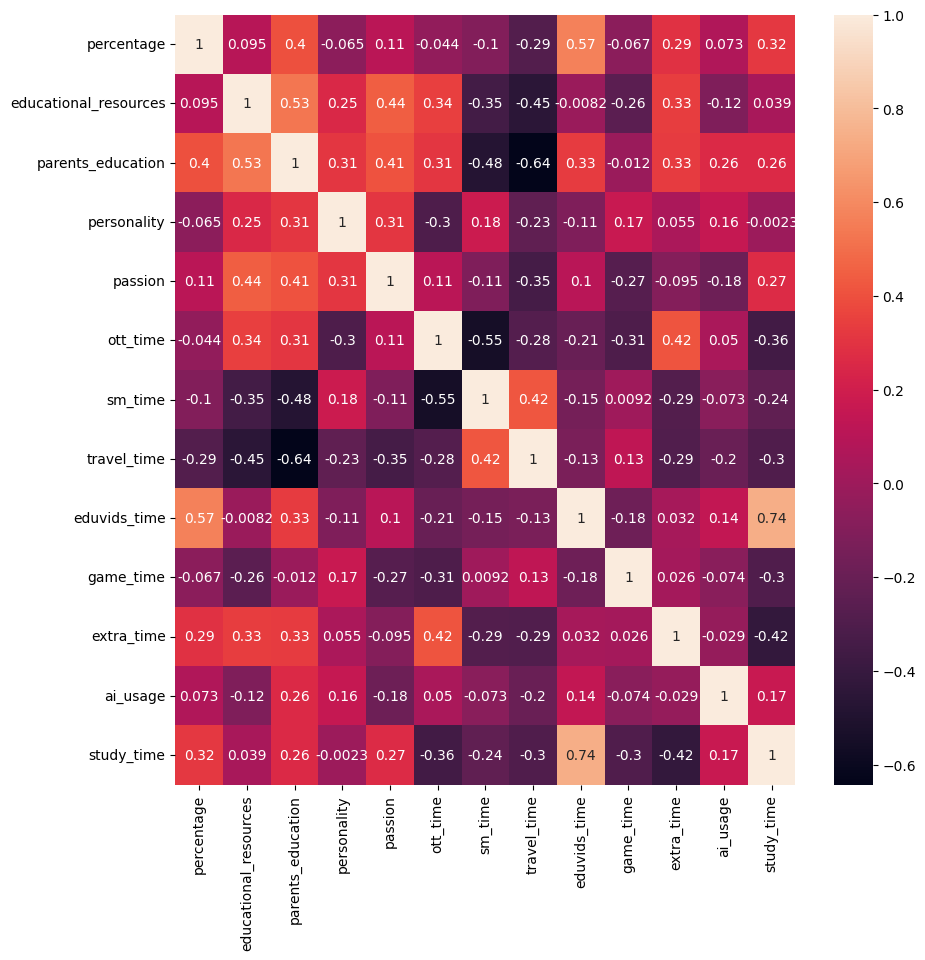

In [113]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [114]:
X = df.drop(columns=['percentage'])
y = data['percentage']

In [115]:
X = pd.get_dummies(X)

In [116]:
y.shape

(1002,)

In [117]:
X.shape

(1002, 12)

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.4, random_state=10)

print(X_train.shape)
print(X_test.shape)

(601, 12)
(401, 12)


In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pickle
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=40)

# Initialize the random forest regressor
rf_model = RandomForestRegressor()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)

# Save the trained model to a file using pickle
with open('C:/Users/Admin/OneDrive/Desktop/3rd Year Project/random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf_model, model_file)

# Load the trained model from the file (for deployment)
with open('C:/Users/Admin/OneDrive/Desktop/3rd Year Project/random_forest_model.pkl', 'rb') as model_file:
    deployed_model = pickle.load(model_file)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean Squared Error: 3.6439918296648006
R-squared Score: 0.9766669737633638


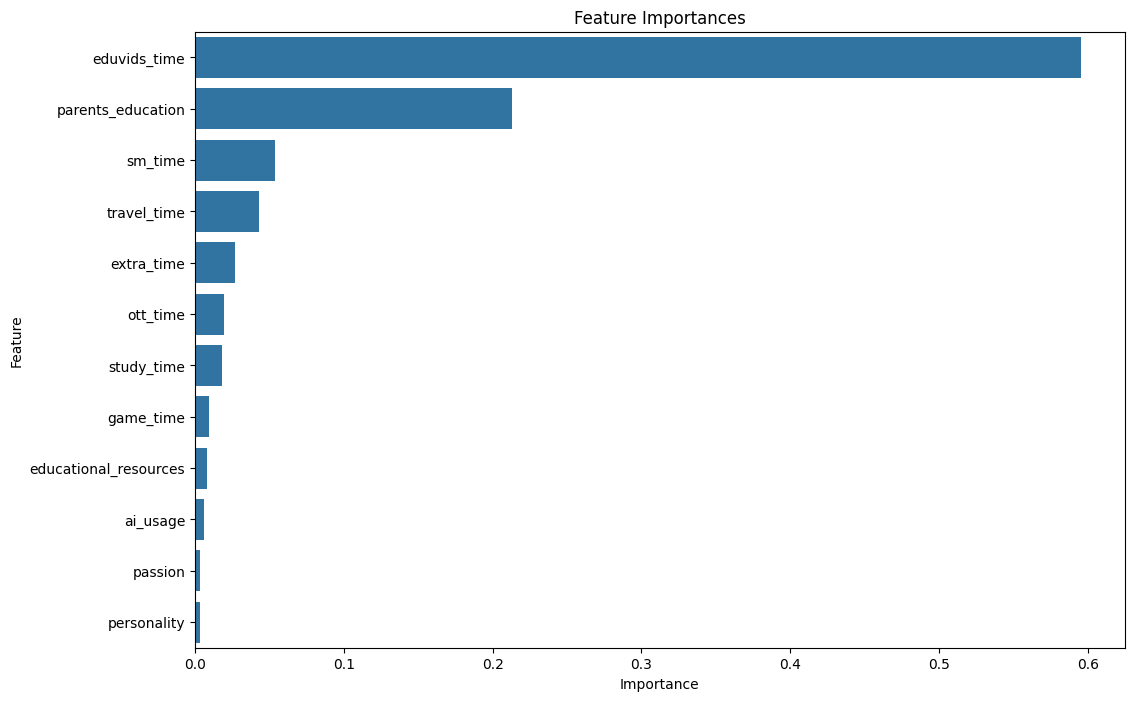

In [120]:
# Get feature importances from the trained model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': df.drop(columns=['percentage']).columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

In [121]:
y_train.shape

(601,)

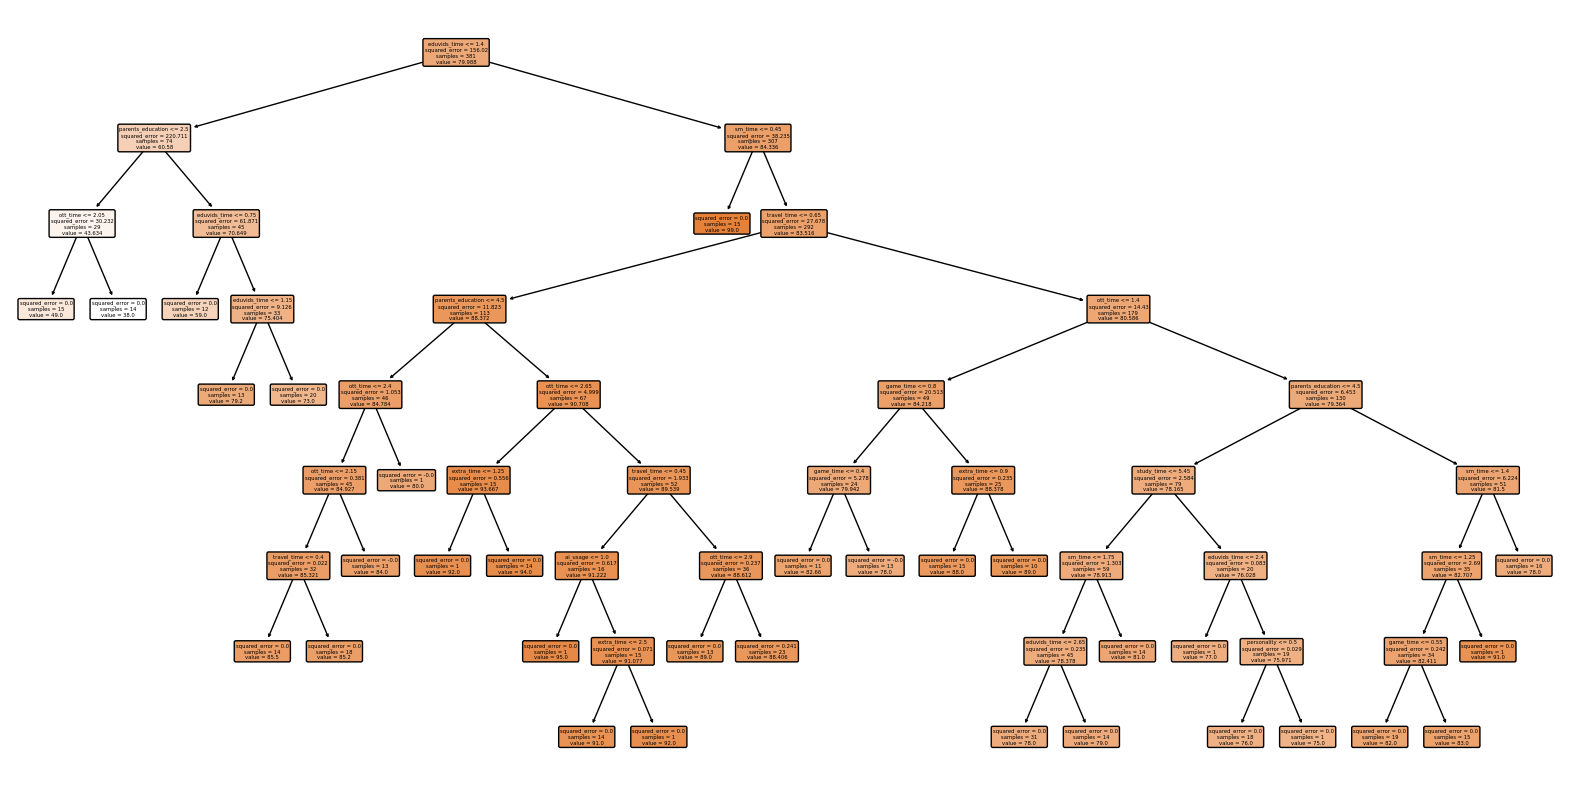

In [122]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the first tree in the random forest (you can choose any tree index)
plt.figure(figsize=(20, 10))
plot_tree(best_rf_model.estimators_[0], feature_names=df.drop(columns=['percentage']).columns, filled=True, rounded=True)
plt.show()

In [123]:
y_pred.shape

(401,)

In [124]:
print(y_pred)


[81.         78.         88.         82.96166651 93.15111111 82.70326651
 99.         78.         82.70326651 78.         76.         85.5
 82.70326651 81.         99.         76.         89.         88.53339751
 81.         78.         78.         88.         85.5        89.
 78.         79.         81.         99.         78.         78.
 79.         89.         88.53339751 78.         88.53339751 76.
 85.5        89.         49.         78.         79.         73.
 91.         59.         94.         85.2        82.70326651 83.5989702
 82.96166651 88.53339751 82.96166651 88.53339751 59.         59.
 38.         82.96166651 82.96166651 73.         78.         59.
 83.99344482 81.         88.         83.99344482 81.98549957 94.
 91.         79.2        91.         79.         94.         85.5
 91.         94.         78.         81.         82.96166651 88.53339751
 81.98549957 89.         88.         78.         79.         81.
 38.         82.70326651 85.5        88.53339751 88.53339

In [125]:
# Create a DataFrame
df = pd.DataFrame({'predicted_score': y_pred})
# Save to a CSV file
df.to_csv('performance.csv', index=False)



In [126]:
# Create a DataFrame with the predicted scores
recommendation_df = pd.DataFrame({'predicted_score': y_pred})


# Define a threshold for recommendations
threshold = 80

# Create a new column 'recommendation' based on the threshold
recommendation_df['recommendation'] = recommendation_df['predicted_score'].apply(lambda x: 'High' if x >= threshold else 'Low')

# Display the recommendation DataFrame
print(recommendation_df.head())

# Save the recommendation DataFrame to a new CSV file
recommendation_df.to_csv('performance.csv', index=False)
print("Recommendations saved to 'performance.csv'")

   predicted_score recommendation
0        81.000000           High
1        78.000000            Low
2        88.000000           High
3        82.961667           High
4        93.151111           High
Recommendations saved to 'performance.csv'
